In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
features = pd.DataFrame(boston.data, columns = boston.feature_names)
target = pd.DataFrame(boston.target, columns = ["Target"])

In [5]:
data = pd.concat([features, target], axis=1)

In [282]:
correlation = data.corr('pearson')


In [9]:
abs(correlation['Target']).sort_values()

CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
AGE        0.376955
RAD        0.381626
CRIM       0.388305
NOX        0.427321
TAX        0.468536
INDUS      0.483725
PTRATIO    0.507787
RM         0.695360
LSTAT      0.737663
Target     1.000000
Name: Target, dtype: float64

In [10]:
x = data['RM']
y = data['Target']
z = data['LSTAT']

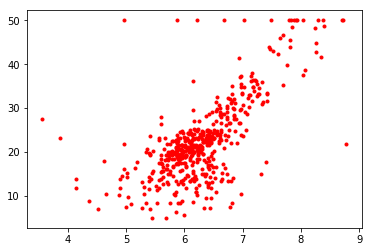

In [11]:
plt.plot(x,y,'r.')

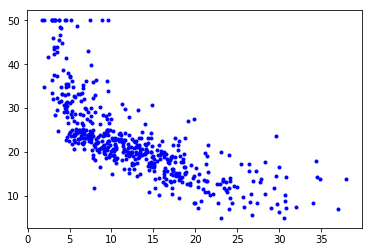

In [12]:
plt.plot(z,y,'b.')

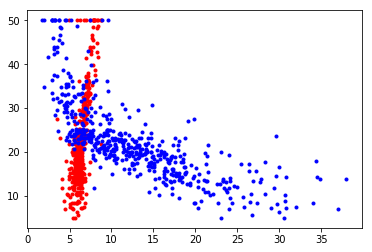

In [13]:
plt.plot(x,y,'r.',z,y,'b.')

In [74]:
#normalization
#x = (x- x.min())/(x.max()-x.min())
y = (y-x.min())/(y.max() - y.min())
x = (z - z.min())/(z.max()- z.min())

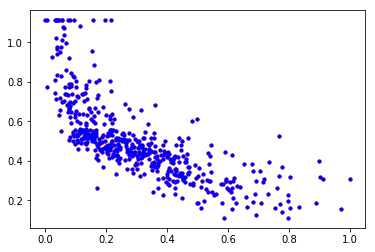

In [75]:
plt.plot(x,y,'r.',z,y,'b.')


In [76]:
# np is faster and consumes less memory so convert data to np
#x = np.array(x)
x =np.array(z)
y = np.array(y)

In [225]:
#divide datasets to train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [226]:
x_train.size


404

In [227]:
x_test.size


102

In [230]:
def hypothesis(a, x, b):
    return b*np.exp(a*x)

In [243]:
def error(a,x,b,y):
    e = 0
    m = len(x) #length of data set
    
    for i in range(m):
        e += np.power(((a*x[i])+np.log(b)-np.log(y[i])),2)
        
    
        
    return (1 /(2* m))*e

In [244]:
def step_gradient(a,x,b,y,learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    
    for i in range(m):
        grad_a+=(1/m)*((a*x[i])+np.log(b)-np.log(y[i]))*x[i]
        grad_b+=(1/m)*((a*x[i])+np.log(b)-np.log(y[i]))*(1/b)
        
    a = a - grad_a * learning_rate
    b = b - grad_b * learning_rate
    
    return a, b

In [245]:
def descend(init_a, x, init_b, y, learning_rate, iterations):
    a = init_a
    b =init_b

    
    for i in range(iterations):
        e = error(a,x,b,y)
        
        if i %1000 == 0:
            print(f"Error:{np.sqrt(e)}, a:{a},b:{b}")
            
        a,b = step_gradient(a,x,b,y,learning_rate)
        
    return a,b

In [273]:
a = -1.6379943604142078
b = 0.7639981556408185
learning_rate = 0.01
iterations = 10000

In [274]:
final_a,final_b = descend(a,x_train,b,y_train,learning_rate,iterations)

Error:0.17226049755396844, a:-1.6379943604142078,b:0.7639981556408185
Error:0.17226049755396844, a:-1.6379943604142078,b:0.7639981556408185
Error:0.17226049755396844, a:-1.6379943604142078,b:0.7639981556408185
Error:0.17226049755396844, a:-1.6379943604142078,b:0.7639981556408185
Error:0.17226049755396844, a:-1.6379943604142078,b:0.7639981556408185
Error:0.17226049755396844, a:-1.6379943604142078,b:0.7639981556408185
Error:0.17226049755396844, a:-1.6379943604142078,b:0.7639981556408185
Error:0.17226049755396844, a:-1.6379943604142078,b:0.7639981556408185
Error:0.17226049755396844, a:-1.6379943604142078,b:0.7639981556408185
Error:0.17226049755396844, a:-1.6379943604142078,b:0.7639981556408185


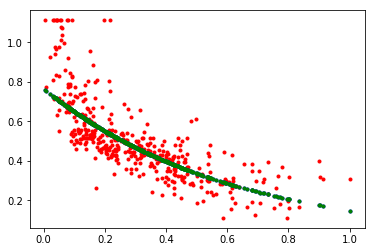

In [276]:
plt.plot(x_train, y_train, 'r.',
        x_train, hypothesis(a,x_train,b),'b.',
        x_train, hypothesis(final_a, x_train,final_b),'g.')

In [277]:
final_a, final_b

(-1.6379943604142078, 0.7639981556408185)

In [278]:
x_test[:3]

array([0.57974614, 0.51296909, 0.17025386])

In [279]:
y_test[:3]

array([0.18666667, 0.16      , 0.48      ])

In [280]:
hypothesis(final_a,x_test[:3],final_b)

array([0.29558146, 0.32974674, 0.57806742])

In [281]:
np.sqrt(error(final_a,x_test,final_b,y_test))

0.16833678718491302